<a href="https://colab.research.google.com/github/flowergum/Colorization/blob/main/My_colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, \
                                    Dense, \
                                    MaxPool2D,\
                                    Dropout, \
                                    Flatten, \
                                    BatchNormalization, InputLayer, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from skimage.color import rgb2lab, lab2rgb
import tensorflow as tf
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
def processed_image(img):
  image = img.resize( (128, 128))               # нужный нам размер
  image = np.array(image, dtype=float)          # в массив
  size = image.shape                            # размер изображения
  lab = rgb2lab(1.0/255*image)                  #  в лаб, предварительно переведя в диапазон от 0 до 1
  X, Y = lab[:,:,0], lab[:,:,1:]                #в Х кладем яркостную компоненту, в Y -- две цветовые

  Y /= 128                                     # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(size[0], size[1], 1)
  Y = Y.reshape(size[0], size[1], 2)
  return X, Y, size

In [4]:
#images = np.concatenate((x_train, y_train), axis = 3)
#print(images.shape)
#plt.imshow(lab2rgb(images[1]))
#np.random.shuffle(images)
#plt.imshow(lab2rgb(images[1]))
#x_train, y_train = np.reshape((images[:, :, :, 0]), (images.shape[0], images.shape[1], images.shape[2], 1)), np.reshape((images[:, :, :, 1:]), (images.shape[0], images.shape[1], images.shape[2], 2))
#print(x_train.shape, y_train.shape)


In [5]:
# img = Image.open('drive/MyDrive/Colorization/Step_2.Flowers/test/6.jpg')   # тут проверяем, что пространство норм 
# image = img.resize( (128, 128))              
# image = np.array(image, dtype=float)         
# size = image.shape                           
# lab = rgb2lab(1.0/255*image)                 
# X, Y, Z = lab[:,:,0], lab[:,:,1], lab[:,:,2] 
# A = np.zeros((128, 128))                                 
# #X = X.reshape(1, size[0], size[1], 1)
# #Y = Y.reshape(1, size[0], size[1], 1)
# #Z = Z.reshape(1, size[0], size[1], 1)
# print(X.shape, ', ', Y.shape, ', ', Z.shape)
# X1 = np.stack((X, A, A), axis=2)
# Y1 = np.stack((A, Y, A), axis=2)
# Z1 = np.stack((A, A, Z), axis=2)
# A1 = np.stack((X, Y, Z), axis=2)
# print(X1.shape)
# plt.subplot(2, 4, 1)
# plt.imshow(lab2rgb(X1))
# plt.subplot(2, 4, 2)
# plt.imshow(lab2rgb(Y1))
# plt.subplot(2, 4, 3)
# plt.imshow(lab2rgb(Z1))
# plt.subplot(2, 4, 4)
# plt.imshow(lab2rgb(A1))
# #Как я поняла, дальше он сам решает, что ему дали только зеленый канал или только красный, оэтому получаются странные результаты
# plt.subplot(2, 4, 5)
# plt.imshow((X1))
# plt.subplot(2, 4, 6)
# plt.imshow((Y1))
# plt.subplot(2, 4, 7)
# plt.imshow((Z1))
# plt.subplot(2, 4, 8)
# plt.imshow((A1))

In [6]:
import zipfile
import os
from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt

#скачиваем и распаковываем .zip файл с изображениями, делать 1 раз
#z = zipfile.ZipFile('/content/drive/MyDrive/Colorization/zip/Dataset_not_random.zip', 'r')
#img = z.extractall()


In [7]:
x_train1 = np.empty((10000, 128, 128, 1)) 
y_train1 = np.empty((10000, 128, 128, 2)) 
x_test1 = np.empty((2000, 128, 128, 1)) 
y_test1 = np.empty((2000, 128, 128, 2)) 

#путь к папке с распакованными изображениями
path = '/content/Dataset_not_random'
fileList = os.listdir(path)
j=0
for i in fileList:
   file = Image.open(('/content/Dataset_not_random/' + i),)
   X, Y, size = processed_image(file)
   #переводим изображение в массив
   if j < 10000:
        #x_train1.append(np.asarray(X))
        #y_train1.append(np.asarray(Y))
        x_train1[j] = np.asarray(X)
        y_train1[j] = np.asarray(Y)
   if j >= 10000:
        #x_test1.append(np.asarray(X))
        #y_test1.append(np.asarray(Y))
        x_test1[j-10000] = np.asarray(X)
        y_test1[j-10000] = np.asarray(Y)
   j=j+1
   if j%1000 == 0 or j == 50018 or j == 50019:
      print(j)
   if j >= 12000:
      break
   file.close()


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [8]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(10000, 128, 128, 1) (10000, 128, 128, 2) (2000, 128, 128, 1) (2000, 128, 128, 2)


In [16]:
model = Sequential()                                                      # Последовательная
model.add(InputLayer(input_shape=(None, None, 1)))                        # Входной слой, подаем на вход яркостную компоненту
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))          # Свертка, 64 фильтра
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2))) #Растягивает картинку
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(BatchNormalization())
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [28]:
model2 = Sequential()     #из статьи сравниваю
model2.add(InputLayer(input_shape=(None, None, 1)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model2.add(UpSampling2D((2, 2)))

model2.compile(optimizer='adam', loss='mse')

In [ ]:
history2 = model2.fit(x=x_train, y=y_train, batch_size=100, epochs=35) #всего 55 эпох (55 -- оптимально: размер изображения: 128*128, 2500 картинок на 5 классов)

In [17]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.load_weights("drive/MyDrive/Colorization/weights/st_1_flowers.h5")

In [18]:
history = model.fit(x=x_train1, y=y_train1, batch_size=500, epochs=6, validation_data=(x_test1, y_test1))

Epoch 1/6
20/20 [==============================] - 40s 2s/step - loss: 0.1871 - val_loss: 0.1746
Epoch 2/6
20/20 [==============================] - 38s 2s/step - loss: 0.0384 - val_loss: 0.0530
Epoch 3/6
20/20 [==============================] - 37s 2s/step - loss: 0.0299 - val_loss: 0.0180
Epoch 4/6
20/20 [==============================] - 37s 2s/step - loss: 0.0178 - val_loss: 0.0174
Epoch 5/6
20/20 [==============================] - 38s 2s/step - loss: 0.0156 - val_loss: 0.0301
Epoch 6/6
20/20 [==============================] - 38s 2s/step - loss: 0.0159 - val_loss: 0.0199


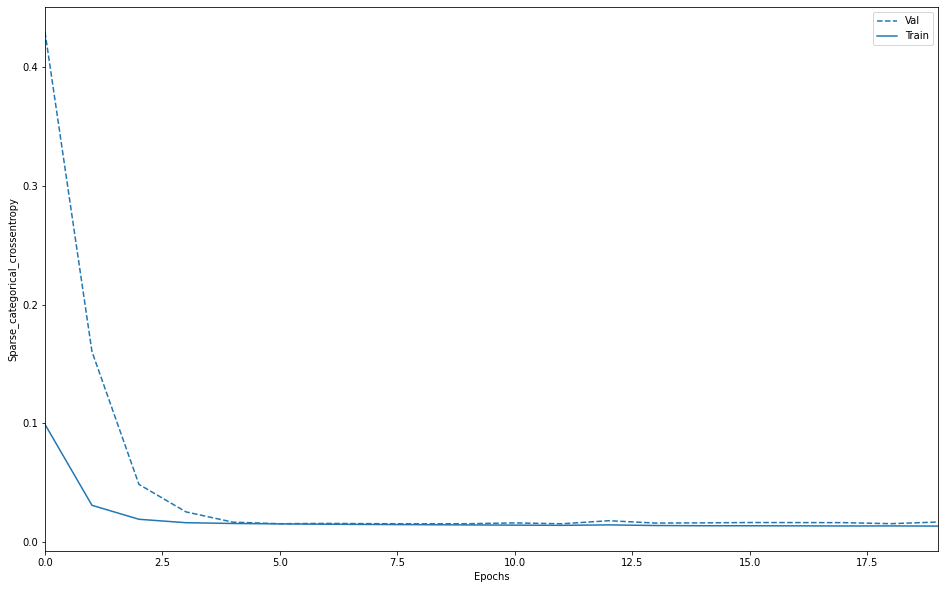

In [11]:
#C BatchNormalization
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

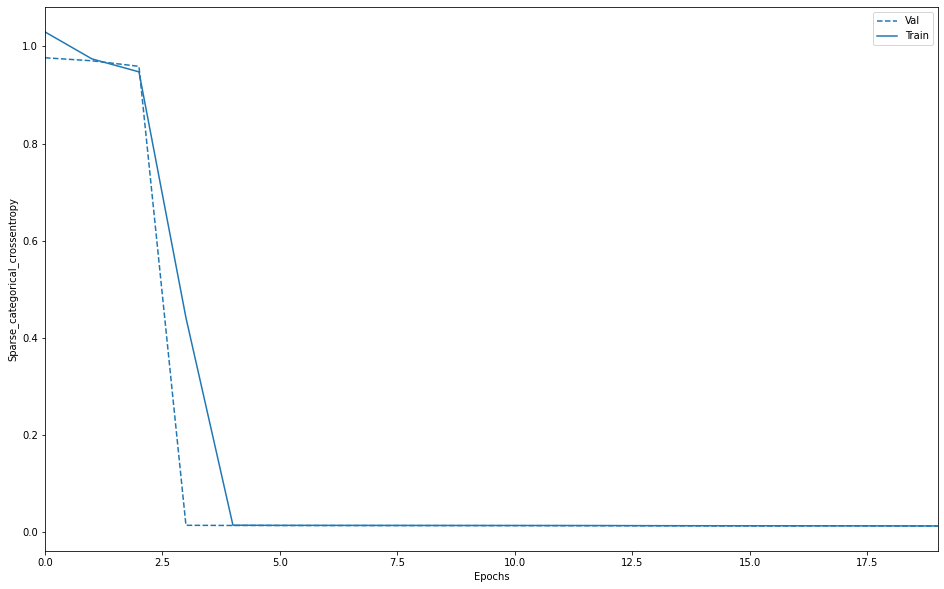

In [12]:
#Без BatchNormalization
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

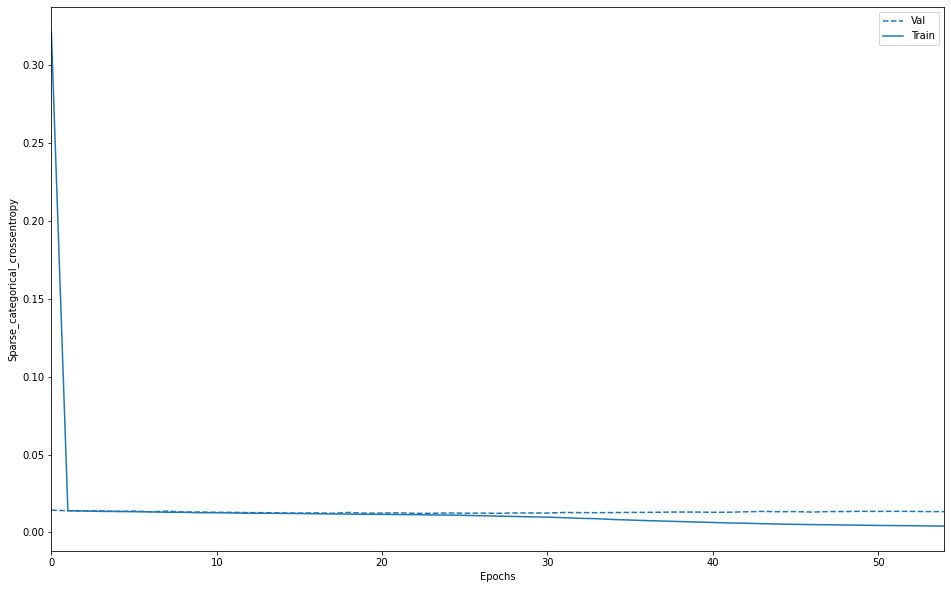

In [ ]:
#тут видно переобучение где-то с 18 эпохи
plt.figure(figsize=(16,10))
plt.xlabel('Epochs')
plt.ylabel("Sparse_categorical_crossentropy")
val = plt.plot(history.epoch, history.history['val_'+'loss'],
                   '--', label='Val')
plt.plot(history.epoch, history.history["loss"], color=val[0].get_color(),
             label='Train')
plt.legend()
plt.xlim([0,max(history.epoch)])
plt.show()

(1, 128, 128, 1)


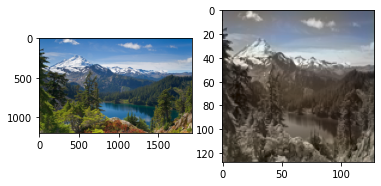

In [21]:
img = Image.open('/content/drive/MyDrive/Colorization/2_Natural_Images/data/natural_images/1.jpg')
#Если захотим посмотреть на кота: "drive/MyDrive/Colorization/2_Natural_Images/data/natural_images/cat/cat_0873.jpg"
#Цветок: "drive/MyDrive/Colorization/1_Flowers/input/flowers/flowers/sun-flower-2593596_960_720.jpg"
A, Y, size = processed_image(img)
X = np.reshape((A), (1, 128, 128, 1))
print(X.shape)
output = model.predict(X)


output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))



(1, 128, 128, 1)


/usr/local/lib/python3.7/dist-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 1 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


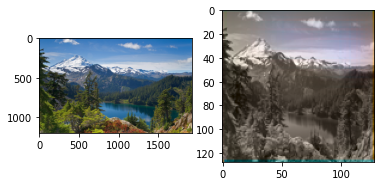

In [27]:
img = Image.open('/content/drive/MyDrive/Colorization/2_Natural_Images/data/natural_images/1.jpg')
#Если захотим посмотреть на кота: "drive/MyDrive/Colorization/2_Natural_Images/data/natural_images/cat/cat_0873.jpg"
#Цветок: "drive/MyDrive/Colorization/1_Flowers/input/flowers/flowers/sun-flower-2593596_960_720.jpg"
A, Y, size = processed_image(img)
X = np.reshape((A), (1, 128, 128, 1))
print(X.shape)
output = model.predict(X)


output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))

In [ ]:
model.save_weights("drive/MyDrive/Colorization/weights/st_2_car_dog_cat.h5")

In [ ]:
# model = Sequential()                                                      # Последовательная
# model.add(InputLayer(input_shape=(None, None, 1)))                        # Входной слой, подаем на вход яркостную компоненту
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))          # Свертка, 64 фильтра
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2))) #Растягивает картинку
# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))